In [11]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

In [5]:
IMG = '../../../img'

In [35]:
def plot(img, **kwargs):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, **kwargs)
    plt.show()

In [8]:
def plot_image(
        image_1, image_2, title_1='Original', title_2='New Image'):
    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.tight_layout()
    plt.show()

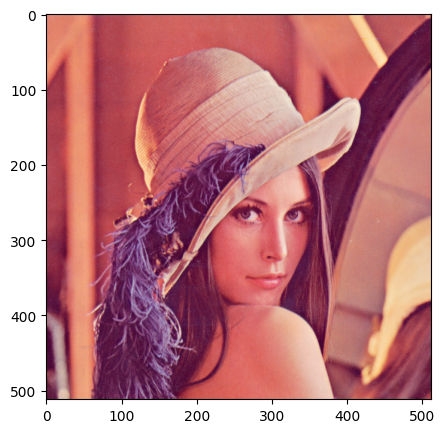

In [6]:
image = Image.open(f'{IMG}/lenna.png')
plot(image)

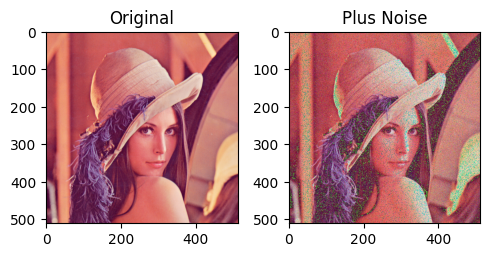

In [16]:
rows, cols = image.size
noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
noisy_image = image + noise
noisy_image = Image.fromarray(noisy_image)
plot_image(image, noisy_image, title_2='Plus Noise')

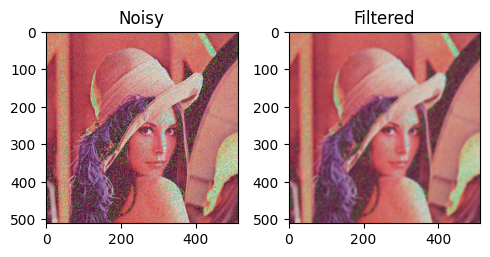

In [19]:
kernel = np.ones((5, 5)) / 36
kernel_filter = ImageFilter.Kernel((5, 5), kernel.flatten())
image_filtered = noisy_image.filter(kernel_filter).filter(kernel_filter)
plot_image(noisy_image, image_filtered, 'Noisy', 'Filtered')

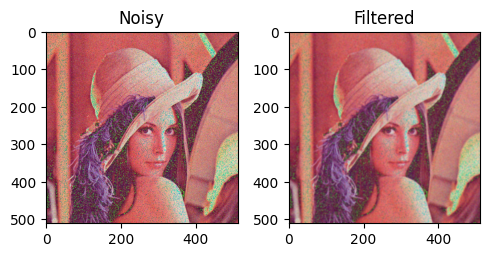

In [20]:
kernel = np.ones((3, 3)) / 36
kernel_filter = ImageFilter.Kernel((3, 3), kernel.flatten())
image_filtered = noisy_image.filter(kernel_filter).filter(kernel_filter)
plot_image(noisy_image, image_filtered, 'Noisy', 'Filtered')

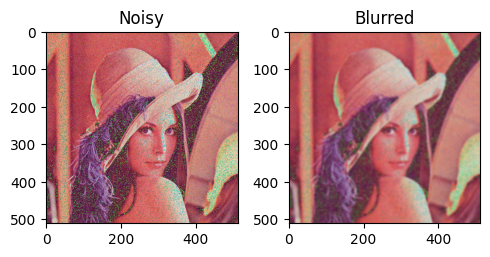

In [21]:
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur) # 2x2
plot_image(noisy_image, image_filtered, 'Noisy', 'Blurred')

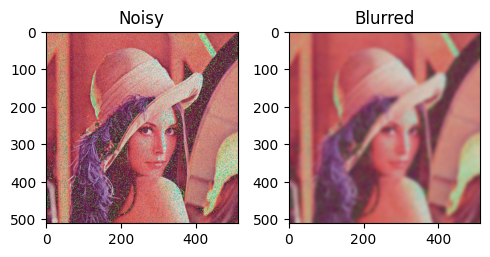

In [22]:
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))  # 4x4
plot_image(noisy_image, image_filtered, 'Noisy', 'Blurred')

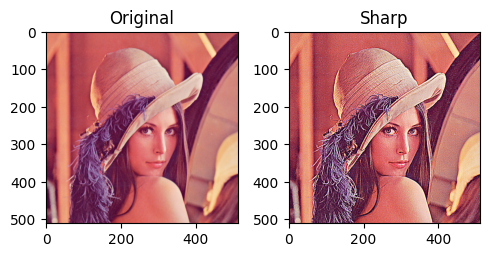

In [30]:
# Common Kernel for image sharpening
kernel = np.array(
    [[-1,-1,-1], 
    [-1, 9,-1],
    [-1,-1,-1]])
kernel = ImageFilter.Kernel((3, 3), kernel.flatten())
sharpened = image.filter(kernel)
plot_image(image, sharpened, 'Original', 'Sharp')

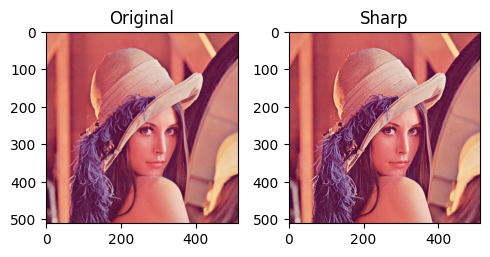

In [31]:
sharpened = image.filter(ImageFilter.SHARPEN)
plot_image(image, sharpened, title_2='Sharp')

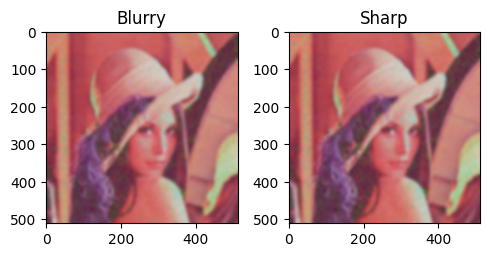

In [32]:
sharpened = image_filtered.filter(ImageFilter.SHARPEN)
plot_image(image_filtered, sharpened, 'Blurry', 'Sharp')

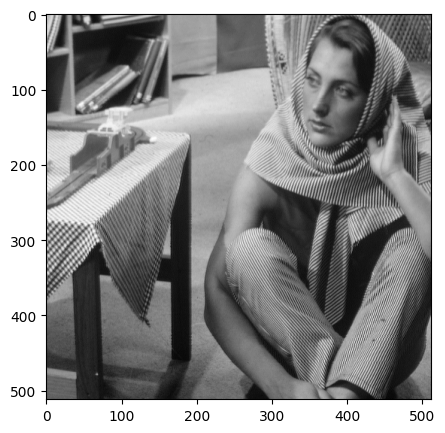

In [36]:
img_gray = Image.open(f'{IMG}/barbara.png')
plot(img_gray, cmap='gray')

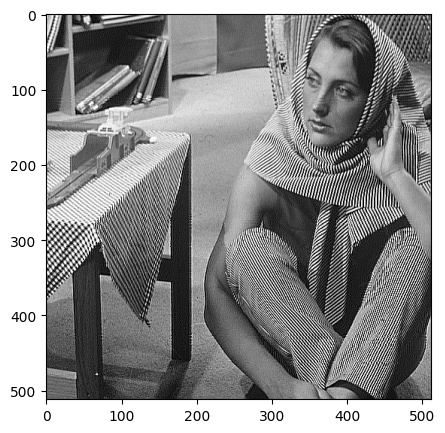

In [37]:
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
plot(img_gray, cmap='gray')

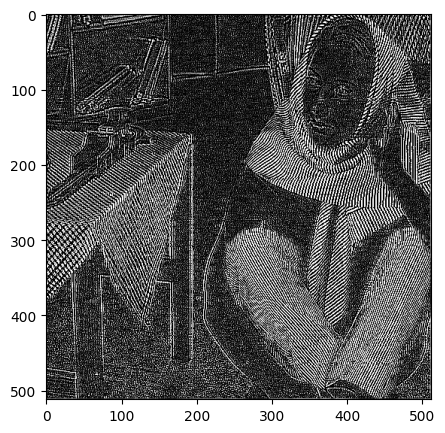

In [39]:
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
plot(img_gray, cmap='gray')

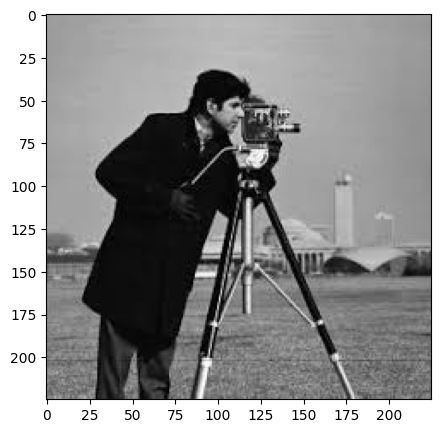

In [41]:
image = Image.open(f'{IMG}/cameraman.jpeg')
plot(image, cmap='gray')

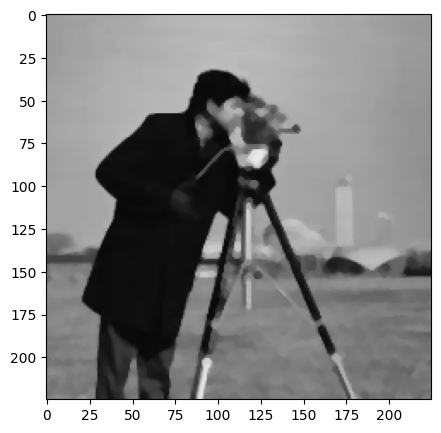

In [44]:
image = (
    image
    .filter(ImageFilter.MedianFilter)
    .filter(ImageFilter.MedianFilter)
    .filter(ImageFilter.MedianFilter))
plot(image, cmap='gray')